## This notebook is about learning data analysis using Python ##
### Focus is to explore the data in order to get some insight from them ###

#### Step 1 : importing the data ####

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns #Data visualization library based on matplotlib
# matplotib inline is a "magic" function to include graphs in a notebook
%matplotlib inline  

path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
print (df.head())

# list the data types for each column
print(df.dtypes)


   symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0    

#### Step 2 : Correlation between variables ####

In [4]:
print (df.corr()) # Display the correlation between all variables

# Let's more specifically print the correlation between the following variables:
print(df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr())

                   symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses   0.466264           1.000000   -0.056661  0.019424   
wheel-base         -0.535987          -0.056661    1.000000  0.876024   
length             -0.365404           0.019424    0.876024  1.000000   
width              -0.242423           0.086802    0.814507  0.857170   
height             -0.550160          -0.373737    0.590742  0.492063   
curb-weight        -0.233118           0.099404    0.782097  0.880665   
engine-size        -0.110581           0.112360    0.572027  0.685025   
bore               -0.140019          -0.029862    0.493244  0.608971   
stroke             -0.008245           0.055563    0.158502  0.124139   
compression-ratio  -0.182196          -0.114713    0.250313  0.159733   
horsepower          0.075819           0.217299    0.371147  0.579821   
peak-rpm            0.279740           0.239543   -

a/ Positive linear relationship

Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

(0, 55762.205739521276)

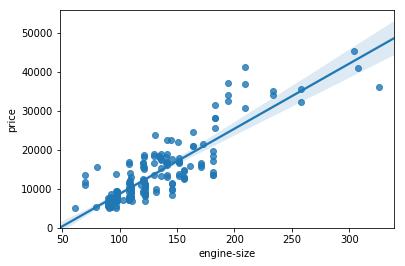

In [5]:
# As an example, let's find the scatterplot of "engine-size" and "price"
# We can analyse "engine-size" as a potential predictor for the price.
# For that purpose we can use the function regplot from seaborn library

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [6]:
# We can verify the above deduction by calculation the correlation between those 2 variables:

df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


It appears the correlation is at a high level of 0.87 (close to 1) 

             highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000


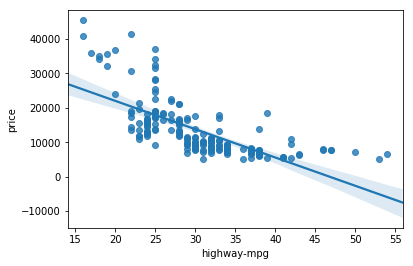

In [8]:
# Let's now find out whether "highway-mpg" also has an impact on the price:

sns.regplot(x="highway-mpg", y="price", data=df)
print (df[['highway-mpg', 'price']].corr())

It does indeed have a linear negative relationship with the price, correlation isn't as strong as the engine-size though (-0.7) 

          peak-rpm     price
peak-rpm  1.000000 -0.101616
price    -0.101616  1.000000


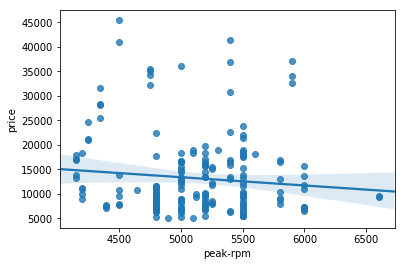

In [9]:
# Let's now take a 3rd and last example and study the correclation between peak-rpm and price:

sns.regplot(x="peak-rpm", y="price", data=df)
print (df[['peak-rpm','price']].corr())

In that case we see the negative correlation between the 2 variables is very weak(-0.1). Visually, we see the dots are scattered.